**Classifying movie reviews: a binary classification example**

#Load the dataset

In [1]:
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
train_data.shape

(25000,)

In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels.shape

(25000,)

In [5]:
train_labels[0]

1

In [6]:
max([max(sequence) for sequence in train_data])

9999

In [7]:
# Decode reviews back to text
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)
decode_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]]
)
print(decode_review)

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should

Note: "0" - Padding. "1" - Start of sequence. "2" - Unknown.

#Prepare the data

**Encoding the integer sequence via multi-hot encoding**

In [8]:
# Prepare inputs

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i, j] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [9]:
# Prepare outputs
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")
#y_train = train_labels.copy()
#y_test = test_labels.copy()

#Build the model

**Define the model**

In [24]:
from tensorflow import keras
from tensorflow.keras import layers, callbacks, models

model = keras.Sequential(
    [layers.Dense(16, activation="relu"),
     layers.Dense(16, activation="relu"),
     layers.Dense(1, activation="sigmoid")
    ]
)

**Compile the model**

In [11]:
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

#Validate the model

**Fit the model with a validation set**

In [12]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [13]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 132ms/step - accuracy: 0.7035 - loss: 0.5909 - val_accuracy: 0.8692 - val_loss: 0.3937
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.8962 - loss: 0.3391 - val_accuracy: 0.8823 - val_loss: 0.3163
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9228 - loss: 0.2474 - val_accuracy: 0.8877 - val_loss: 0.2852
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9351 - loss: 0.2023 - val_accuracy: 0.8895 - val_loss: 0.2757
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9521 - loss: 0.1608 - val_accuracy: 0.8889 - val_loss: 0.2764
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9585 - loss: 0.1376 - val_accuracy: 0.8572 - val_loss: 0.3746
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9636 - loss: 0.1235 - val_accuracy: 0.8859 - val_loss: 0.2939
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9712 - loss: 0.1010 - val_accuracy: 0.8841 - 

**Plot the training and validation loss**

In [14]:
import matplotlib.pyplot as plt

def plot_training_validation_results(training_results, validation_results,
                                     title, ylabel):
  print("training: ", training_results)
  print("validation: ", validation_results)
  plt.clf()
  epochs = range(1, len(training_results)+1)
  plt.plot(epochs, training_results, "bo", label="Training")
  plt.plot(epochs, validation_results, "b", label="Validation")
  plt.xlabel("Epochs")
  plt.ylabel(ylabel)
  plt.legend()
  plt.show()

training:  [0.5191118717193604, 0.3238038420677185, 0.2412736862897873, 0.20062147080898285, 0.16541580855846405, 0.13833047449588776, 0.12104400247335434, 0.10775548219680786, 0.09029611945152283, 0.07841061800718307, 0.07044024020433426, 0.06025758758187294, 0.05095954239368439, 0.04444516822695732, 0.03833947330713272, 0.03449837118387222, 0.028878238052129745, 0.027648242190480232, 0.01661888137459755, 0.019901731982827187]
validation:  [0.39374783635139465, 0.316293329000473, 0.28524360060691833, 0.27573850750923157, 0.27644509077072144, 0.3745833933353424, 0.2938958704471588, 0.30759191513061523, 0.32758504152297974, 0.37482142448425293, 0.36214500665664673, 0.37528252601623535, 0.4121401011943817, 0.4351843297481537, 0.43931353092193604, 0.45952108502388, 0.4884580075740814, 0.5151544809341431, 0.5280256271362305, 0.5493575930595398]


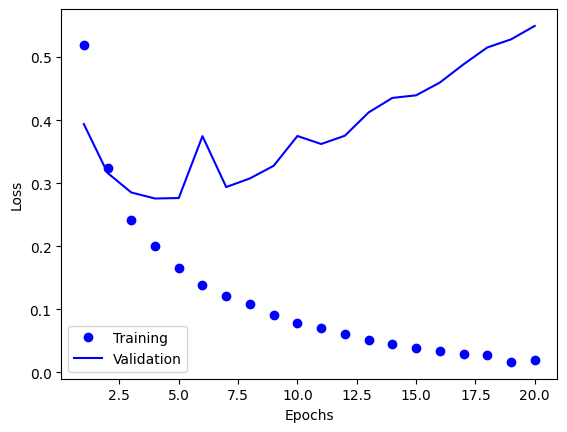

In [15]:
history_dict = history.history
training_loss_values = history_dict["loss"]
validation_loss_values = history_dict["val_loss"]
plot_training_validation_results(training_loss_values, validation_loss_values,
                                 "Training and validation loss", "Loss")

training:  [0.781000018119812, 0.8949333429336548, 0.9218666553497314, 0.9330000281333923, 0.9468666911125183, 0.9562666416168213, 0.9639333486557007, 0.966866672039032, 0.9749333262443542, 0.9789333343505859, 0.9814000129699707, 0.9847333431243896, 0.9883333444595337, 0.9905999898910522, 0.9927999973297119, 0.9931333065032959, 0.9936666488647461, 0.994533360004425, 0.9989333152770996, 0.9963333606719971]
validation:  [0.8691999912261963, 0.8823000192642212, 0.8877000212669373, 0.8895000219345093, 0.8888999819755554, 0.857200026512146, 0.8859000205993652, 0.8841000199317932, 0.8773999810218811, 0.8725000023841858, 0.8774999976158142, 0.8758999705314636, 0.8730999827384949, 0.8720999956130981, 0.871999979019165, 0.8719000220298767, 0.8702999949455261, 0.8680999875068665, 0.8704000115394592, 0.8683000206947327]


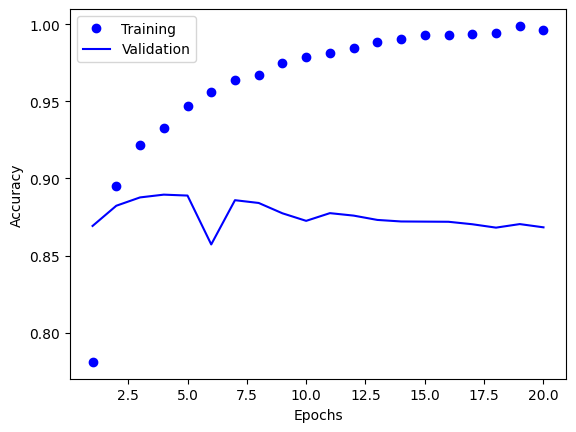

In [16]:
training_acc = history_dict["accuracy"]
validation_acc = history_dict["val_accuracy"]
plot_training_validation_results(training_acc, validation_acc,
                                 "Training and validation accuracy",
                                 "Accuracy")

**Refine the model**

In [28]:
# Define the model with Dropout layers added after each hidden layer
model = keras.Sequential([
    layers.Dense(16, activation="relu", input_shape=(x_train.shape[1],)),
    layers.Dropout(0.5),  # Dropout after first hidden layer
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),  # Dropout after second hidden layer
    layers.Dense(1, activation="sigmoid")
])


model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

# Callbacks: Early stopping and ModelCheckpoint
callbacks_list = [
    callbacks.EarlyStopping(
        monitor="val_accuracy",  # Monitors validation accuracy
        patience=2  # Stops training if no improvement for 2 epochs
    ),
    callbacks.ModelCheckpoint(
        filepath="checkpoint_path.keras",  # Saves the best model here
        monitor="val_loss",  # Saves the model based on validation loss
        save_best_only=True
    )
]

# Fit the model with validation set and add the callbacks
history = model.fit(
    x_train, y_train,
    epochs=30,  # High epoch count to allow early stopping
    batch_size=512,
    validation_data=(x_val, y_val),  # Validation set for early stopping and checkpointing
    callbacks=callbacks_list
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - accuracy: 0.6038 - loss: 0.6531 - val_accuracy: 0.8763 - val_loss: 0.4584
Epoch 2/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7910 - loss: 0.4876 - val_accuracy: 0.9080 - val_loss: 0.3209
Epoch 3/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8504 - loss: 0.3893 - val_accuracy: 0.9243 - val_loss: 0.2369
Epoch 4/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8814 - loss: 0.3260 - val_accuracy: 0.9362 - val_loss: 0.1904
Epoch 5/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9001 - loss: 0.2744 - val_accuracy: 0.9450 - val_loss: 0.1637
Epoch 6/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9176 - loss: 0.2423 - val_accuracy: 0.9536 - val_loss: 0.1415
Epoch 7/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9283 - loss: 0.2145 - val_accuracy: 0.9567 - val_loss: 0.1251
Epoch 8/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9331 - loss: 0.2014 - val_accuracy: 0.9655 - v

#Predict new data

In [29]:
model = models.load_model("checkpoint_path.keras")

In [30]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[1.9298036e-02],
       [1.0000000e+00],
       [9.9998462e-01],
       ...,
       [5.9819117e-04],
       [4.2819837e-03],
       [3.6774224e-01]], dtype=float32)

In [31]:
results = model.evaluate(x_test, y_test)
print(results)

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8721 - loss: 0.5954
[0.5883846282958984, 0.8730800151824951]
